In [1]:
!sudo pip install fbprophet

In [2]:
# check prophet version
import fbprophet
# print version number
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
from matplotlib.pyplot import figure
import pandas as pd
# import yfinance
# from mpl_finance import candlestick_ohlc
import time
from datetime import datetime
import math
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [5]:
from pandas import read_csv
path = '/content/drive/MyDrive/SIH- Hack Inversion/Coding/data/nymex_4ind.csv'
nasd = read_csv(path)
print(nasd.shape)
nasd = nasd.drop(columns = ['Unnamed: 0'])
nasd.head()

(2554, 12)


,Date,Close,Volume,Open,High,Low,SMA,EMA,MACD,DateTime,Custom
0,2012-03-12,2.269,82299.0,2.272,2.289,2.235,0.0,0.0,0.0,2012-03-12,100.0
1,2012-03-13,2.299,114622.0,2.270,2.338,2.207,0.0,0.0,0.0,2012-03-13,100.0
2,2012-03-14,2.284,120435.0,2.329,2.343,2.248,0.0,0.0,0.0,2012-03-14,100.0
3,2012-03-15,2.279,117788.0,2.275,2.331,2.234,0.0,0.0,0.0,2012-03-15,100.0
4,2012-03-16,2.326,112037.0,2.267,2.349,2.247,0.0,0.0,0.0,2012-03-16,100.0


In [6]:
train_df, test_df = nasd[:1660], nasd[1660:] 

In [ ]:
train_df=train_df.reindex(index=train_df.index[::-1])[181:]
test_df = test_df.reindex(index=test_df.index[::-1])

In [7]:
train_df

,Date,Close,Volume,Open,High,Low,SMA,EMA,MACD,DateTime,Custom
0,2012-03-12,2.269,82299.0,2.272,2.289,2.235,0.000000,0.000000,0.000000,2012-03-12,100.000000
1,2012-03-13,2.299,114622.0,2.270,2.338,2.207,0.000000,0.000000,0.000000,2012-03-13,100.000000
2,2012-03-14,2.284,120435.0,2.329,2.343,2.248,0.000000,0.000000,0.000000,2012-03-14,100.000000
3,2012-03-15,2.279,117788.0,2.275,2.331,2.234,0.000000,0.000000,0.000000,2012-03-15,100.000000
4,2012-03-16,2.326,112037.0,2.267,2.349,2.247,0.000000,0.000000,0.000000,2012-03-16,100.000000
...,...,...,...,...,...,...,...,...,...,...,...
1655,2018-08-17,2.946,109269.0,2.908,2.968,2.908,2.822755,2.852568,-0.008530,2018-08-17,11.453618
1656,2018-08-20,2.941,107512.0,2.940,2.954,2.903,2.821095,2.853763,-0.007291,2018-08-20,10.950483
1657,2018-08-21,2.980,108256.0,2.953,2.991,2.953,2.819435,2.855469,-0.005602,2018-08-21,15.071377
1658,2018-08-22,2.956,85909.0,2.991,2.993,2.953,2.816116,2.856828,-0.004271,2018-08-22,12.641936


In [8]:
train_data = train_df[['Date', 'Close']]
train_data.head()

,Date,Close
0,2012-03-12,2.269
1,2012-03-13,2.299
2,2012-03-14,2.284
3,2012-03-15,2.279
4,2012-03-16,2.326


In [9]:
test_data = test_df[['Date', 'Close']]
test_data.head()

,Date,Close
1660,2018-08-24,2.917
1661,2018-08-27,2.876
1662,2018-08-28,2.852
1663,2018-08-29,2.895
1664,2018-08-30,2.874


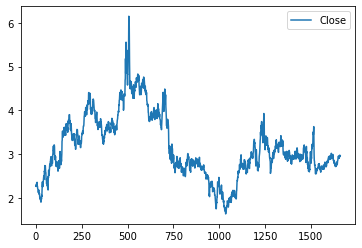

In [10]:
from matplotlib import pyplot

train_data.plot()
pyplot.show()

In [11]:
from pandas import to_datetime
train_data['Date']= to_datetime(train_data['Date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
from pandas import to_datetime
test_data['Date']= to_datetime(test_data['Date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
train_data.rename(columns = {'Date':'ds'}, inplace = True)
train_data.rename(columns = {'Close':'y'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
test_data.rename(columns = {'Date':'ds'}, inplace = True)
test_data.rename(columns = {'Close':'y'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
train_data

,ds,y
0,2012-03-12,2.269
1,2012-03-13,2.299
2,2012-03-14,2.284
3,2012-03-15,2.279
4,2012-03-16,2.326
...,...,...
1655,2018-08-17,2.946
1656,2018-08-20,2.941
1657,2018-08-21,2.980
1658,2018-08-22,2.956


In [16]:
test_data

,ds,y
1660,2018-08-24,2.917
1661,2018-08-27,2.876
1662,2018-08-28,2.852
1663,2018-08-29,2.895
1664,2018-08-30,2.874
...,...,...
2549,2022-03-07,4.833
2550,2022-03-08,4.527
2551,2022-03-09,4.526
2552,2022-03-10,4.631


In [30]:
test_data['y'].diff()

1660      NaN
1661   -0.041
1662   -0.024
1663    0.043
1664   -0.021
        ...  
2549   -0.183
2550   -0.306
2551   -0.001
2552    0.105
2553    0.094
Name: y, Length: 894, dtype: float64

In [17]:
from fbprophet import Prophet
model = Prophet()

model.fit(train_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [25]:
test_data.iloc[0]['ds']

Timestamp('2018-08-24 00:00:00')

In [40]:
haha = pd.Series(test_data[['ds']].iloc[0])
haha

ds   2018-08-24
Name: 1660, dtype: datetime64[ns]

In [42]:
type(test_data[['ds']])

pandas.core.frame.DataFrame

In [46]:
future = test_data[['ds']]
forecast = model.predict(future)

In [45]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-08-24,2.779175,2.40751,3.022742,2.779175,2.779175,-0.069034,-0.069034,-0.069034,-0.019152,-0.019152,-0.019152,-0.049882,-0.049882,-0.049882,0.0,0.0,0.0,2.710141


          ds      yhat  yhat_lower  yhat_upper
0 2018-08-24  2.710141    2.423036    3.002783
1 2018-08-27  2.704996    2.411933    3.009116
2 2018-08-28  2.719297    2.421760    3.014269
3 2018-08-29  2.726149    2.407435    3.035666
4 2018-08-30  2.728248    2.419615    3.014271


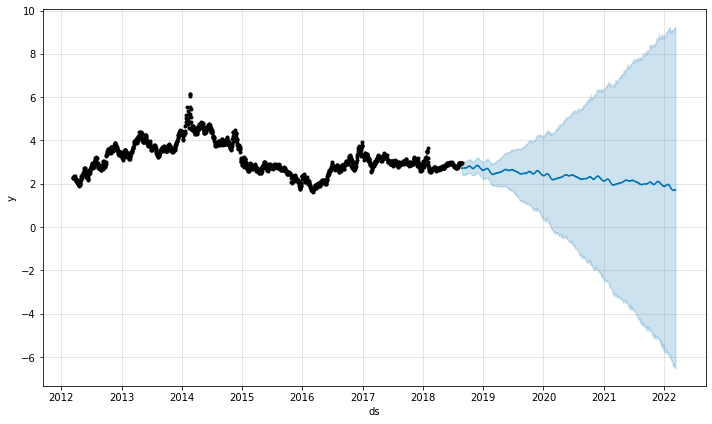

In [47]:
# future = list()
# for i in range(1, 13):
# 	date = '1968-%02d' % i
# 	future.append([date])
# future = DataFrame(future)
# future.columns = ['ds']
# future['ds']= to_datetime(future['ds'])

future = test_data[['ds']]

forecast = model.predict(future)

print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

model.plot(forecast)
pyplot.show()

In [ ]:
test_data

,ds,y
499,2020-03-19,1.654
498,2020-03-20,1.604
497,2020-03-23,1.602
496,2020-03-24,1.653
495,2020-03-25,1.659
...,...,...
4,2022-03-07,4.833
3,2022-03-08,4.527
2,2022-03-09,4.526
1,2022-03-10,4.631


In [ ]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

            ds      yhat  yhat_lower  yhat_upper
0   2020-03-19  1.810540    1.443541    2.133514
1   2020-03-20  1.810023    1.462427    2.160995
2   2020-03-23  1.797147    1.446974    2.153689
3   2020-03-24  1.805843    1.456040    2.144423
4   2020-03-25  1.812868    1.474219    2.165332
..         ...       ...         ...         ...
495 2022-03-07  0.058272   -2.726703    3.017291
496 2022-03-08  0.065172   -2.741227    3.028947
497 2022-03-09  0.069961   -2.725132    3.116155
498 2022-03-10  0.062035   -2.828787    3.092540
499 2022-03-11  0.060452   -2.841234    3.139681

[500 rows x 4 columns]


In [ ]:
from sklearn.metrics import mean_absolute_error
y_pred = forecast['yhat'].values
y_test = test_data['y'].values
mae = mean_absolute_error(y_test, y_pred)
print(mae)

2.1509427757414916
